In [1]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import seaborn as sns
sns.set_context('notebook', font_scale=1.5, rc={'lines.markeredgewidth': 2})

In [2]:
%load_ext autoreload
%autoreload 2

%matplotlib inline

In [3]:
import visual_behavior.data_access.utilities as utilities
from visual_behavior.data_access import loading as loading

In [4]:
import visual_behavior.visualization.utils as utils
import visual_behavior.visualization.ophys.summary_figures as sf
import visual_behavior.visualization.ophys.platform_paper_figures as ppf
import visual_behavior.visualization.ophys.experiment_summary_figures as ef

In [5]:
import visual_behavior_glm.GLM_params as glm_params
import visual_behavior_glm.GLM_analysis_tools as gat
import visual_behavior_glm.GLM_visualization_tools as gvt

In [6]:
import mindscope_utilities.general_utilities as ms_utils
import mindscope_utilities.visual_behavior_ophys.data_formatting as vb_ophys

import visual_behavior.visualization.utils as utils


In [7]:
import visual_behavior.ophys.response_analysis.utilities as ut
import visual_behavior.ophys.response_analysis.response_processing as rp

from visual_behavior.ophys.response_analysis.response_analysis import ResponseAnalysis


### load experiments and cells tables 

In [8]:
experiments_table = loading.get_platform_paper_experiment_table(limit_to_closest_active=True)
print(len(experiments_table))

cells_table = loading.get_cell_table(limit_to_matched_cells=False, limit_to_closest_active=True)
print(len(cells_table.cell_specimen_id.unique()))

matched_cells_table = loading.get_cell_table(limit_to_matched_cells=True, limit_to_closest_active=True)
print(len(matched_cells_table.cell_specimen_id.unique()))

402
14495
3921


In [9]:
matched_expts = cells_table.ophys_experiment_id.unique()
matched_cells = matched_cells_table.cell_specimen_id.unique()

### get GLM output

In [10]:
import visual_behavior.visualization.ophys.platform_single_cell_examples as psc

In [13]:
base_dir = r'\\allen\programs\braintv\workgroups\nc-ophys\visual_behavior\platform_paper_plots\figure_4'
base_dir = os.path.join(base_dir, glm_version)
if not os.path.exists(base_dir):
    os.mkdir(base_dir)
    
folder = '220226_across_session_norm'
save_dir = os.path.join(base_dir, folder)
if not os.path.exists(save_dir):
    os.mkdir(save_dir)

In [16]:
# get experiments and cells tables limited to the data you want to plot
# whatever filtering is applied here will be applied to GLM results
experiments_table = loading.get_platform_paper_experiment_table(add_extra_columns=True, limit_to_closest_active=True)
print(len(experiments_table), 'expts in expts table')
cells_table = loading.get_cell_table(platform_paper_only=True, limit_to_closest_active=True, limit_to_matched_cells=True, add_extra_columns=True)
print(len(cells_table.ophys_experiment_id.unique()), 'expts in cells table')
print('should only be 402 experiments if limited to matched platform dataset')
print(len(cells_table.cell_specimen_id.unique()), 'unique cell_specimen_ids in cells table')

402 expts in expts table
393 expts in cells table
should only be 402 experiments if limited to matched platform dataset
3921 unique cell_specimen_ids in cells table


### load dropouts normalized across sessisons

In [23]:
import visual_behavior_glm.GLM_across_session as gas
df = gas.load_cells(cells='examples')

108649118 could not be loaded


In [24]:
df = df.set_index('identifier')
df = df.rename(columns={'ophys_experiment_id_x':'ophys_experiment_id', 'cell_specimen_id_x':'cell_specimen_id'})

within = df[[key for key in df.keys() if '_within' in key]+['ophys_experiment_id', 'cell_specimen_id', 'experience_level']]
across = df[[key for key in df.keys() if '_across' in key]+['ophys_experiment_id', 'cell_specimen_id', 'experience_level']]

results_pivoted = across.copy()
results_pivoted = results_pivoted.rename(columns={'omissions_across':'omissions', 'all-images_across':'all-images', 
                                         'behavioral_across':'behavioral', 'task_across':'task'})

In [20]:
_, weights_df, kernels = psc.get_GLM_outputs(glm_version, base_dir, folder, experiments_table, matched_cells_table)

1248 ophys_experiment_ids in results_pivoted after loading


Iterating Sessions:   0%|▏                                                             | 1/393 [00:00<01:03,  6.21it/s]

3921 cell_specimen_ids in results_pivoted after filtering
393 ophys_experiment_ids in results_pivoted after filtering


Interpolating kernels: 100%|███████████████████████████████████████████████████████████| 16/16 [00:09<00:00,  1.66it/s]


Computing average kernels


C:\Users\marinag\AppData\Roaming\Python\Python37\site-packages\pandas\core\generic.py:2530: PerformanceWarning:


your performance may suffer as PyTables will pickle object types that it cannot
map directly to c-types [inferred_type->mixed,key->block3_values] [items->['intercept_weights', 'hits_weights', 'misses_weights', 'omissions_weights', 'running_weights', 'pupil_weights', 'licks_weights', 'image0_weights', 'image1_weights', 'image2_weights', 'image3_weights', 'image4_weights', 'image5_weights', 'image6_weights', 'image7_weights', 'passive_change_weights', 'glm_version', 'equipment_name', 'full_genotype', 'reporter_line', 'sex', 'cre_line', 'indicator', 'project_code', 'targeted_structure', 'date_of_acquisition', 'session_type', 'experience_level', 'image_set', 'all-images_weights', 'preferred_image_weights', 'task_weights', 'omissions_excited']]




3921 cell_specimen_ids in weights_df after loading
3921 cell_specimen_ids in weights_df after filtering


In [25]:
# set features to use in plots
dropout_features = ['all-images', 'omissions', 'behavioral', 'task']
# dropout_features = ['variance_explained_full', 'all-images', 'omissions', 'behavioral', 'task']
# features to use for weights_df
weights_features = ['image0', 'image1', 'image2', 'image3', 'image4', 'image5', 'image6', 'image7', 'hits', 'misses', 'omissions']
# weights_features = ['image0', 'image1', 'image2', 'image3', 'image4', 'image5', 'image6', 'image7', 'hits', 'misses', 'omissions', 'running', 'pupil]

In [26]:
example_cells = df.cell_specimen_id.unique()

In [28]:
save_dir

'\\\\allen\\programs\\braintv\\workgroups\\nc-ophys\\visual_behavior\\platform_paper_plots\\figure_4\\24_events_all_L2_optimize_by_session\\220226_across_session_norm'

In [35]:
np.where(example_cells==1086559968)

(array([3], dtype=int64),)

In [43]:
save_dir

'\\\\allen\\programs\\braintv\\workgroups\\nc-ophys\\visual_behavior\\platform_paper_plots\\figure_4\\24_events_all_L2_optimize_by_session\\220226_across_session_norm'

c:\users\marinag\documents\code\visual_behavior_analysis\visual_behavior\visualization\ophys\platform_single_cell_examples.py:172: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



2 extra cols
cell_specimen_id: 1086490397
experience_level: Familiar
ophys_experiment_id: 795073741
(45,)
(45,)
generating response df


100%|██████████████████████████████████████████████████████████████████████████████████| 45/45 [00:05<00:00,  8.47it/s]


file exists:
loading response df from file for 795073741 filtered_events omissions
experience_level: Novel 1
ophys_experiment_id: 795953296
(33,)


C:\Users\marinag\Documents\Code\AllenSDK\allensdk\brain_observatory\behavior\data_objects\eye_tracking\rig_geometry.py:137: UserWarning:

This ophys session '795953296' has no eye tracking rig metadata. (NWB error: "'eye_tracking_rig_metadata' not found in processing of NWBFile 'root'.")

C:\Users\marinag\Documents\Code\AllenSDK\allensdk\brain_observatory\behavior\data_objects\eye_tracking\eye_tracking_table.py:136: UserWarning:

This ophys experiment '795953296' has no eye tracking data. (NWB error: 'EyeTracking')



(33,)
generating response df


C:\Users\marinag\Documents\Code\AllenSDK\allensdk\brain_observatory\behavior\data_objects\eye_tracking\rig_geometry.py:137: UserWarning:

This ophys session '795953296' has no eye tracking rig metadata. (NWB error: "'eye_tracking_rig_metadata' not found in processing of NWBFile 'root'.")

C:\Users\marinag\Documents\Code\AllenSDK\allensdk\brain_observatory\behavior\data_objects\eye_tracking\eye_tracking_table.py:136: UserWarning:

This ophys experiment '795953296' has no eye tracking data. (NWB error: 'EyeTracking')

100%|██████████████████████████████████████████████████████████████████████████████████| 33/33 [00:06<00:00,  5.28it/s]


could not add mean pupil to stimulus presentations, length of eye_tracking attribute is 0
file exists:
loading response df from file for 795953296 filtered_events omissions
could not add mean pupil to stimulus presentations, length of eye_tracking attribute is 0
experience_level: Novel >1
ophys_experiment_id: 796308505
(49,)
(49,)
generating response df


100%|██████████████████████████████████████████████████████████████████████████████████| 49/49 [00:09<00:00,  5.20it/s]


file exists:
loading response df from file for 796308505 filtered_events omissions


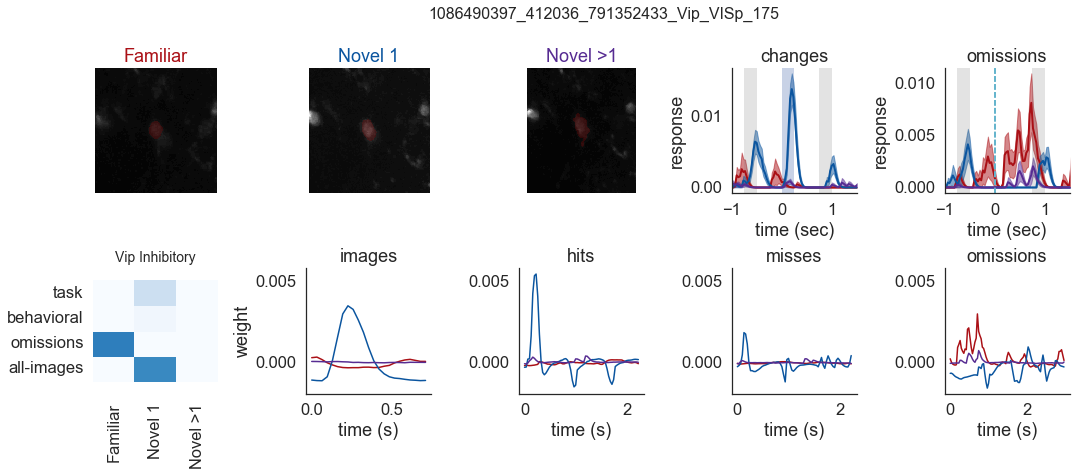

In [44]:
# for cell_specimen_id in example_cells:
cell_specimen_id = example_cells[0]

psc.plot_cell_rois_and_GLM_weights(cell_specimen_id, cells_table, experiments_table, 
                                  results_pivoted, weights_df, 
                                  dropout_features, weights_features, kernels,
                                  save_dir, subfolder=None, data_type='filtered_events')